In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## Problem (case study)

The dataset provided contains data about car insurence and the amounts claimed. By analysing this dataframe we will try to predict the total amount claim depanding on the different profile of customer. Having this knowledge might allow us to make some business decisions regarding adjusting the offer of car insurence policies offered to customer to ensure better profitability. 

## Get data

In [177]:
data = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")

In [178]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [179]:
data.shape

(9134, 24)

## Data cleaning 

In [180]:
#I will start by removing duplicates and checking the value types to make sure the data types are correct. 

In [181]:
data = data.drop_duplicates()
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [182]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [183]:
#My data doesn't have any duplicated (nothing was dropped) and all the types (except effective to data which is a datetime) are correct. 

In [184]:
data1 = data.copy()

In [185]:
#Next I will make sure that all the names of columns follow the same annotation (lower cases, no spaces)

In [186]:
def columns_cleaning (df):
    df.columns = [col.lower().replace(' ','_') for col in df.columns]
    return df

In [187]:
columns_cleaning (data1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [188]:
#Before standardizing the categorical columns, I will remove columns that I won't use in my analysis as they don't carry information that will add much to my analysis (customer id, effective to date)

In [189]:
data1 = data1.drop(["customer", "effective_to_date"], axis=1)

In [190]:
#I will extract categorical columns to run a healthcheck on them to ensure the values provided make sense.

In [191]:
categorical_col = data1.select_dtypes("object")

In [192]:
for col in categorical_col:
    print (categorical_col[col].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


In [193]:
#Categorical data is standardized and doesn't require any cleaning operations. 

Dealing with NaNs

In [194]:
data1.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [195]:
#It looks like we don't have any NaNs to remove in this version of the dataframe so no need to apply "fillna"

In [196]:
#def remove_nans():
    #data1["months_since_last_claim"] = data1["months_since_last_claim"].fillna(data1["months_since_last_claim"].median())
    #data1["number_of_open_complaints"] = data1["number_of_open_complaints"].fillna(data1["number_of_open_complaints"].median())
    #data1["state"] = data1["state"].fillna("Unknown")
    #data1["response"] = data1["response"].fillna("Unknown")
    #data1["vehicle_class"] = data1["vehicle_class"].fillna("Unknown")
    #data1["vehicle_size"] = data1["vehicle_size"].fillna("Unknown")
    #return data1

In [197]:
#remove_nans()

# EDA - Exploratory Data Analysis

In [198]:
summary = data1.describe()
summary

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Checking probability distributions

In [199]:
numerical_columns = data1.select_dtypes("number")

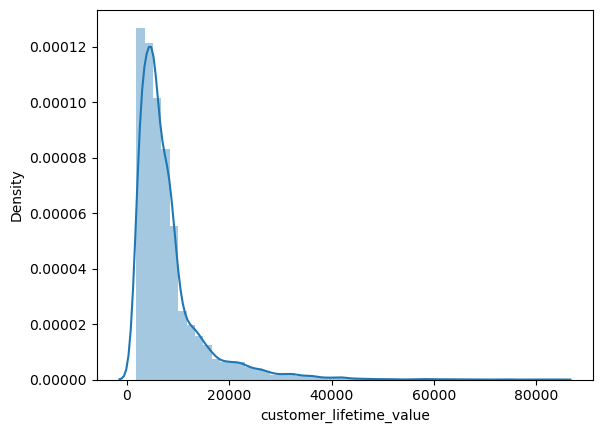

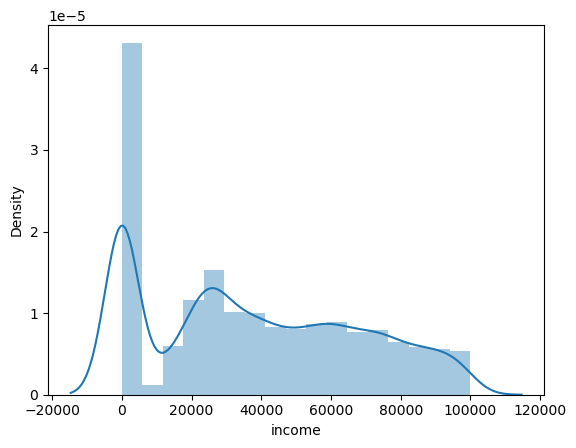

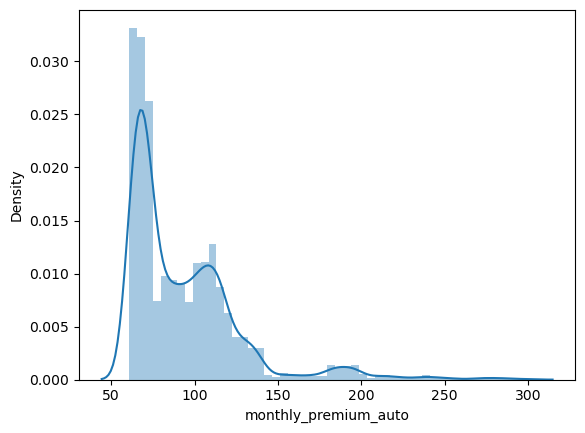

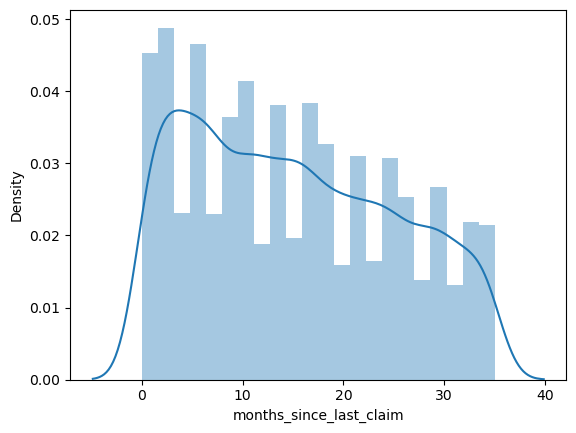

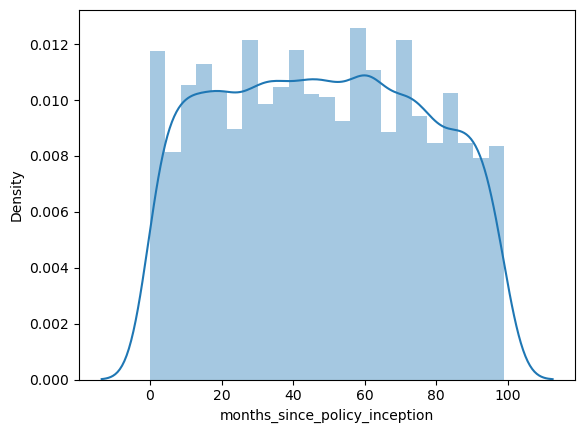

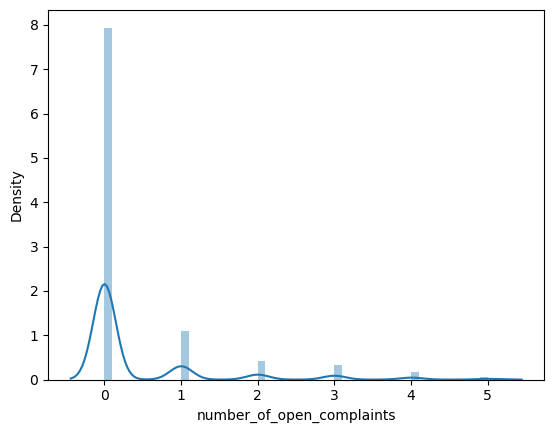

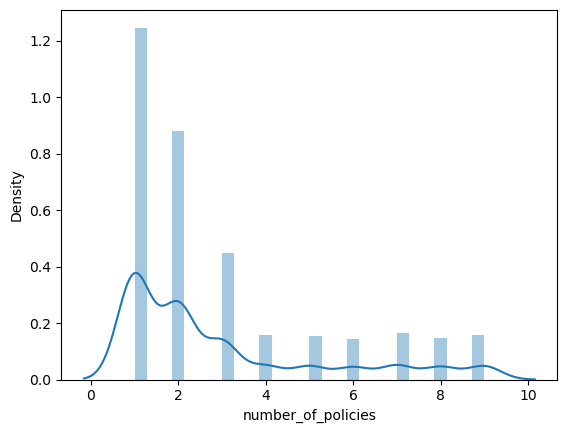

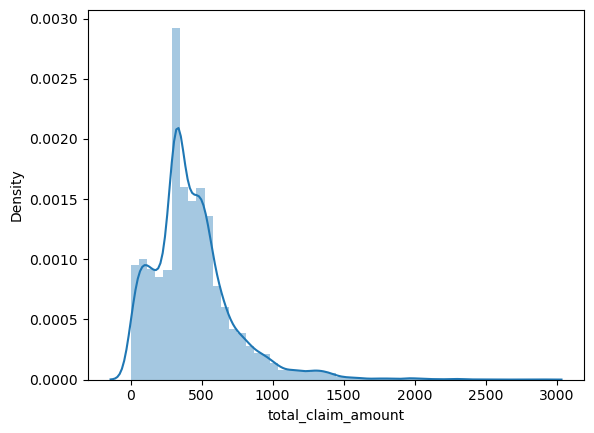

In [200]:
for col in numerical_columns.columns:
    sns.distplot(numerical_columns[col])
    plt.show()

In [201]:
#Based on the customer lifetime value which has a normal distribution (yet with a long skew due to outliers), we can assume that we have a good enough sample. 

Identifying Outliers for the target variable (total_claim_amount)

<Axes: >

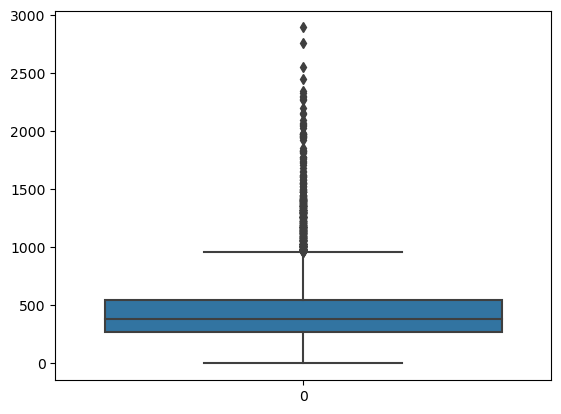

In [202]:
sns.boxplot(data1["total_claim_amount"])

In [203]:
IQR = abs(np.quantile(data1["total_claim_amount"], .25) - np.quantile(data1["total_claim_amount"], .75)) * 1.5
lower_boundary = np.quantile(data1["total_claim_amount"], .25) - IQR
upper_boundary = np.quantile(data1["total_claim_amount"], .75) + IQR

In [204]:
lower_boundary, upper_boundary

(-140.62664687499995, 960.3997301249999)

In [205]:
data1[(data1["total_claim_amount"] > -140.62664687499995) | (data1["total_claim_amount"] < 960.3997301249999)].sort_values("total_claim_amount")

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
2334,Nevada,5004.135361,No,Basic,High School or Below,Employed,M,86834,Rural,Single,...,93,0,8,Corporate Auto,Corporate L1,Offer4,Agent,0.099007,Four-Door Car,Medsize
872,Arizona,4538.847818,No,Basic,Bachelor,Employed,M,82297,Rural,Single,...,62,0,1,Personal Auto,Personal L3,Offer1,Call Center,0.382107,Sports Car,Medsize
5239,California,6186.497831,No,Extended,College,Employed,F,88375,Rural,Divorced,...,11,0,3,Personal Auto,Personal L2,Offer2,Agent,0.423310,Four-Door Car,Medsize
45,Oregon,12819.102890,No,Premium,Doctor,Disabled,F,10105,Rural,Married,...,4,3,3,Personal Auto,Personal L2,Offer1,Branch,0.517753,SUV,Medsize
7632,Arizona,3969.433177,No,Basic,College,Employed,F,49544,Rural,Single,...,29,0,1,Personal Auto,Personal L3,Offer1,Agent,0.769185,SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Oregon,8672.229719,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,83,0,1,Corporate Auto,Corporate L3,Offer1,Branch,2345.413441,Luxury SUV,Medsize
9049,California,32104.699570,No,Premium,High School or Below,Employed,F,89546,Suburban,Married,...,18,1,2,Corporate Auto,Corporate L3,Offer3,Agent,2452.894264,Luxury SUV,Large
4930,Nevada,43217.216110,No,Extended,High School or Below,Employed,M,51504,Suburban,Single,...,99,0,2,Personal Auto,Personal L3,Offer1,Agent,2552.343856,Luxury SUV,Medsize
5074,Nevada,9295.411150,No,Premium,High School or Below,Unemployed,M,0,Suburban,Single,...,44,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,2759.794354,Luxury Car,Medsize


In [206]:
#As visible above we have big differences between the amounts claimed with outliers far from the median.

Correlations between the features and the target

In [207]:
#for numerical values:
correlations_matrix = numerical_columns.corr()
correlations_matrix["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

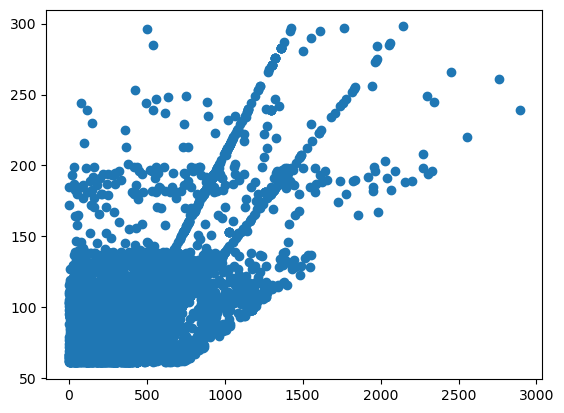

In [208]:
#Monthly_premium_auto has the highest correlation with the target:
plt.scatter(data1["total_claim_amount"], data1["monthly_premium_auto"])

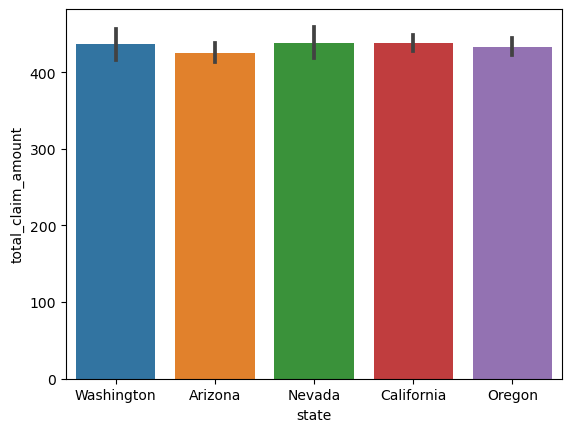

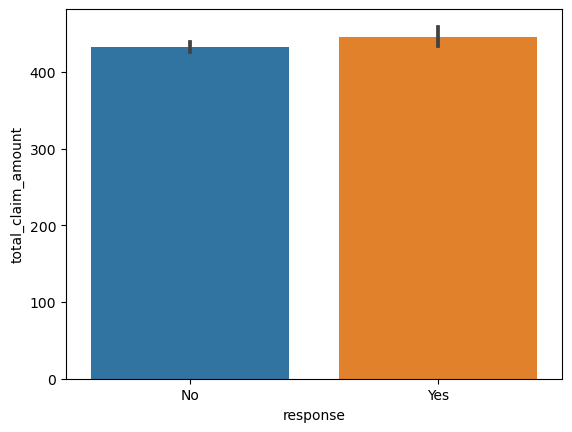

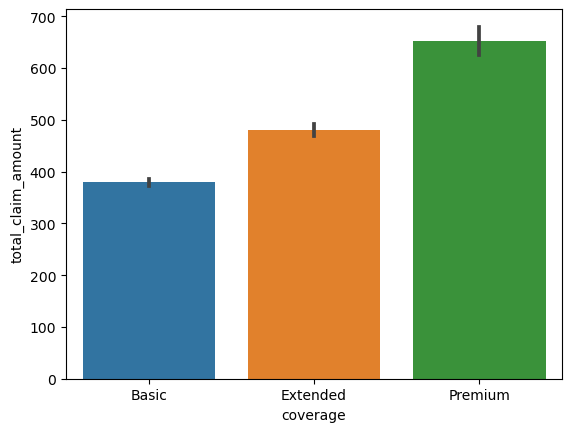

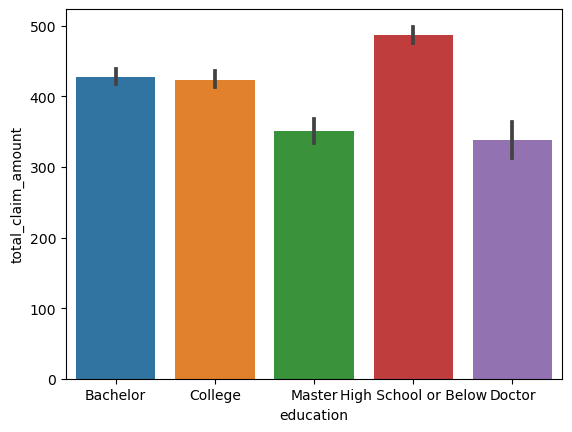

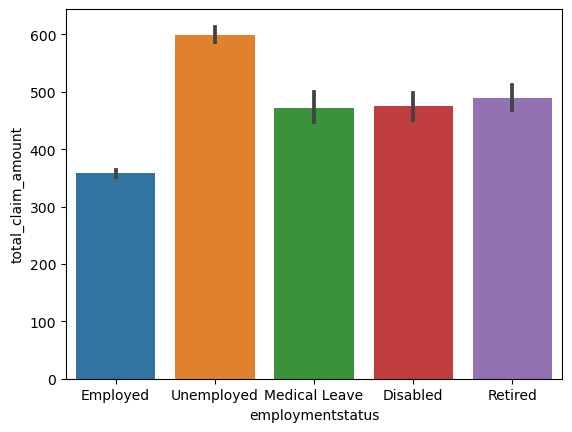

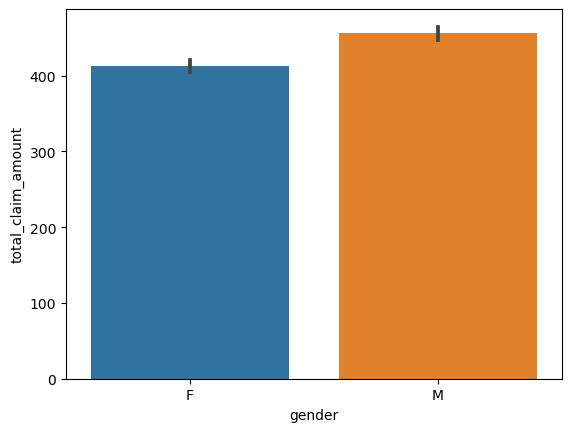

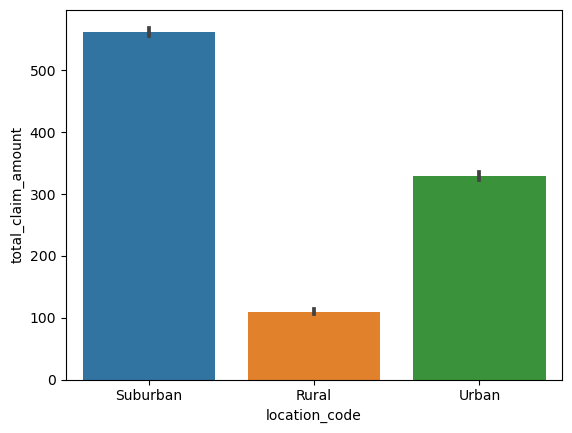

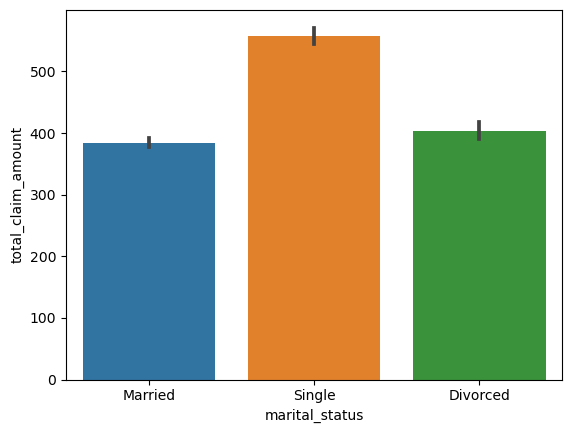

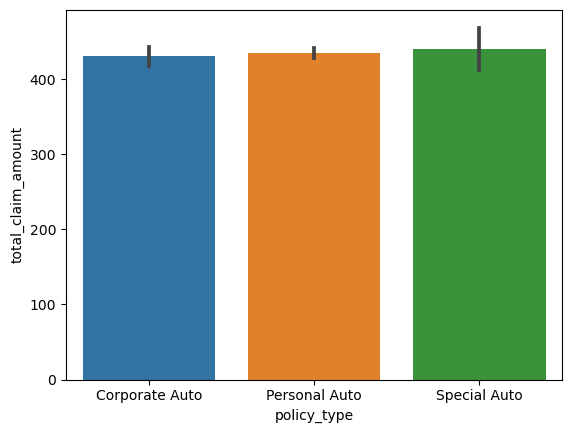

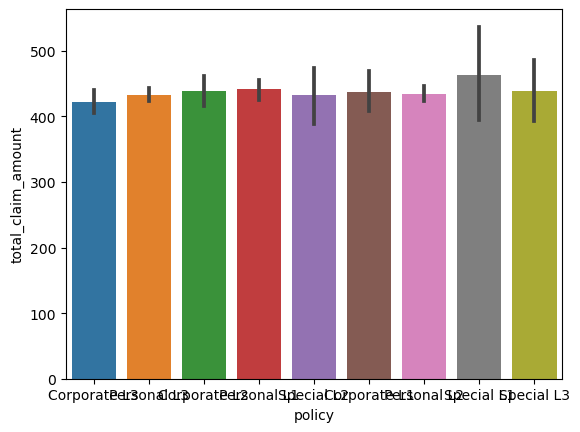

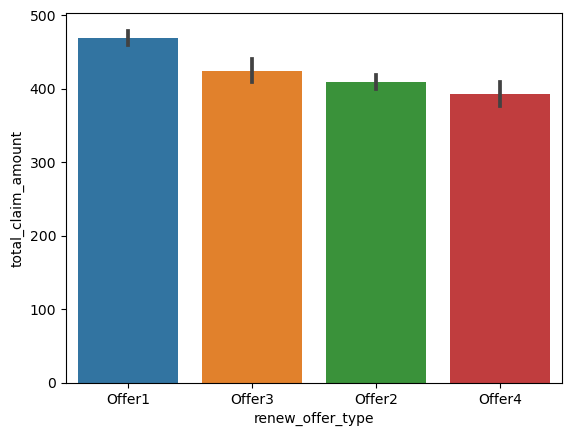

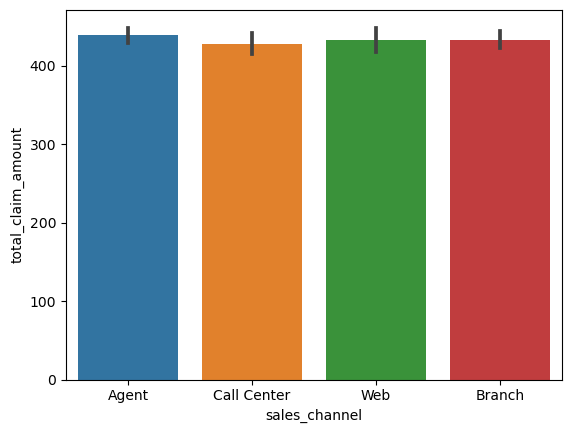

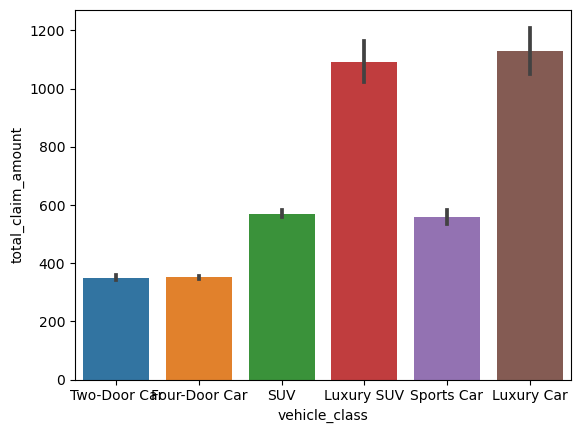

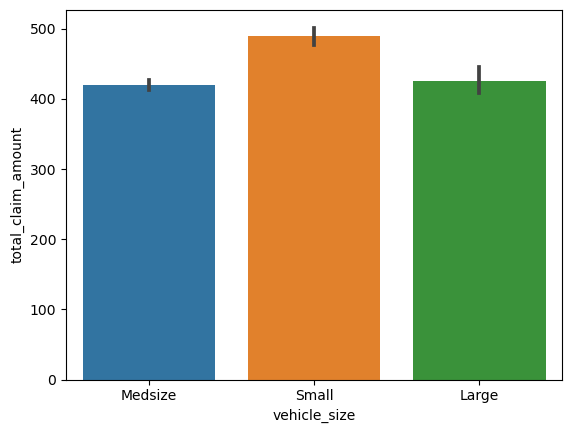

In [209]:
#for categorical values:
for col in categorical_col:
    sns.barplot(x=data1[col], y=data1["total_claim_amount"])
    plt.show()


Looking at those barplots above, we can already make some conclusions regarding the average total claim amount: 
    - no big differences between states (we can consider dropping this column)
    - premium coverage has significantly higher claim amount (to be expected)
    - the higher the education, the lower total claim amount
    - claim amount tends to be higher in the subgroup of unemployed customers
    - amounts claimed are higher for men
    - there are big differences regarding the target depanding on the location code (the lowest for rural, highest for suburban)
    - highest average amount claimed for singles
    - special auto observed the highest average and also has a big variance (outliers might be there)
    - lower average amounts for corporate policies, higher for special policies
    - offer1 generates on average the highest claim amounts
    - no big differences between sales channels
    - as expected, luxury SUV and luxury cars have the highest average total claim amount (with a lot of variance as well so possible that the outliers are there)
    - surprisingly small vehicles have the highest average claim amount

Correlations between the features - Multicolinearity

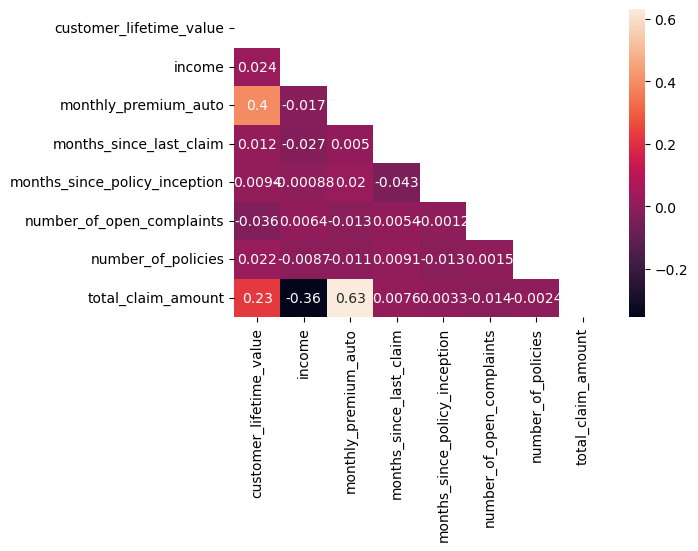

In [210]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [211]:
#We don't observe high correlations between the features (>0.9) so there is nothing to drop. 

## Processing data

In [212]:
#Encoding categorical variables using OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoder.fit(data1[['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']])

OneHotEncoder(drop='first')

In [213]:
encoder.transform(data1[['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']]).todense()

matrix([[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 1., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 1., 1., 0.]])

In [214]:
encoder.categories_[0][1:]
encoder.categories_[1][1:]
encoder.categories_[2][1:]
encoder.categories_[3][1:]
encoder.categories_[4][1:]
encoder.categories_[5][1:]
encoder.categories_[6][1:]
encoder.categories_[7][1:]
encoder.categories_[8][1:]
encoder.categories_[9][1:]
encoder.categories_[10][1:]
encoder.categories_[11][1:]
encoder.categories_[12][1:]
encoder.categories_[13][1:]

array(['Medsize', 'Small'], dtype=object)

In [215]:
data1[list(encoder.categories_[0])[1:] + list(encoder.categories_[1])[1:] + list(encoder.categories_[2])[1:] + list(encoder.categories_[3])[1:] + list(encoder.categories_[4])[1:] + list(encoder.categories_[5])[1:] + list(encoder.categories_[6])[1:] + list(encoder.categories_[7])[1:] + list(encoder.categories_[8])[1:] + list(encoder.categories_[9])[1:] + list(encoder.categories_[10])[1:] + list(encoder.categories_[11])[1:] + list(encoder.categories_[12])[1:] + list(encoder.categories_[13])[1:]] = encoder.transform(data1[['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']]).todense()
data1

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
data1 = data1.drop (['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'], axis=1)
data1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,California,Nevada,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,1131.464935,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,566.472247,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,529.881344,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,138.130879,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,3096.511217,21604,79,14,28,0,1,379.200000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,8163.890428,0,85,9,37,3,2,790.784983,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,7524.442436,21941,96,34,3,0,3,691.200000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
data_final = data1.copy()

In [218]:
data_final

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,California,Nevada,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,1131.464935,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,566.472247,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,529.881344,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,138.130879,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,3096.511217,21604,79,14,28,0,1,379.200000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,8163.890428,0,85,9,37,3,2,790.784983,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,7524.442436,21941,96,34,3,0,3,691.200000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
#X-y split
X = data_final.drop(["total_claim_amount"],axis=1)
y = data_final["total_claim_amount"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [220]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,California,Nevada,Oregon,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
434,5015.009472,48567,130,12,15,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4641,5149.301306,26877,131,5,2,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4952,4904.894731,12902,139,3,51,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1489,8510.525936,0,121,5,94,0,8,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
812,3278.531880,70247,83,13,19,1,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7334.328083,87957,61,31,63,0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5191,5498.940679,22520,73,17,64,0,3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,8992.779137,0,129,13,4,0,7,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
860,14635.451580,0,139,5,56,0,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [221]:
#Normalize (numerical)
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [222]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [223]:
#Linear regression

In [224]:
lm = LinearRegression()

In [225]:
lm.fit(X_train, y_train)

LinearRegression()

In [226]:
predictions = lm.predict(X_test)

In [227]:
#Model validation: R2, MSE, RMSE, MAE:
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.77
MSE: 19182.508693113672
RMSE: 138.500933907009
MAE: 94.52272816801198


## Improving the model

<Axes: xlabel='total_claim_amount'>

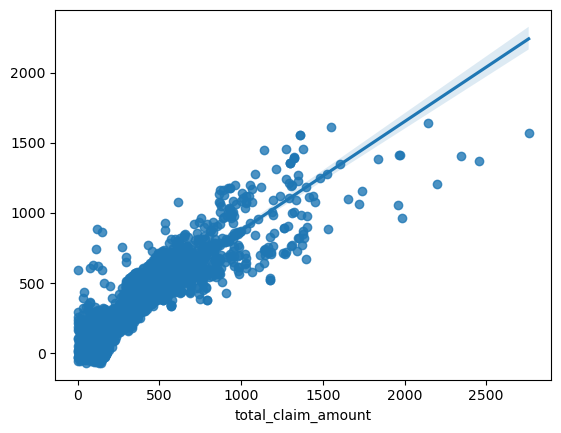

In [228]:
sns.regplot(x=y_test, y=predictions)

In [229]:
#R2 for our model is not too bad (0.77) with majority od points clustered around the regression line. Yet we can observe several values far away from the line suggesting that the model would benefit from some improvements. 

In [230]:
# We can try to rescale the data: 
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled

708     5.387235
47      6.104332
3995    6.111911
1513    5.873924
3686    6.152940
          ...   
4271    6.250747
7923    6.477775
5633    6.481271
8432    5.016475
681     6.115046
Name: total_claim_amount, Length: 2741, dtype: float64

<Axes: xlabel='total_claim_amount', ylabel='Density'>

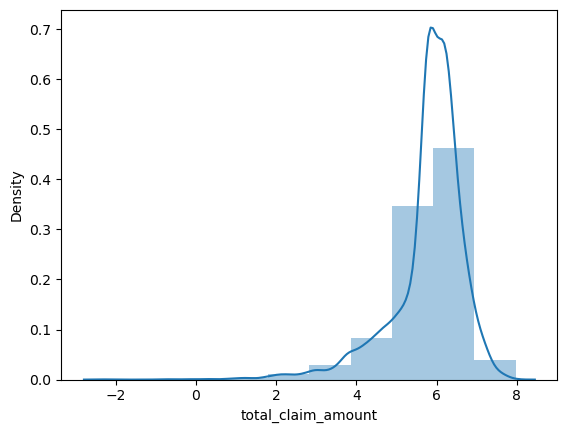

In [231]:
sns.distplot(y_train_scaled, bins=10)

<Axes: xlabel='total_claim_amount', ylabel='Density'>

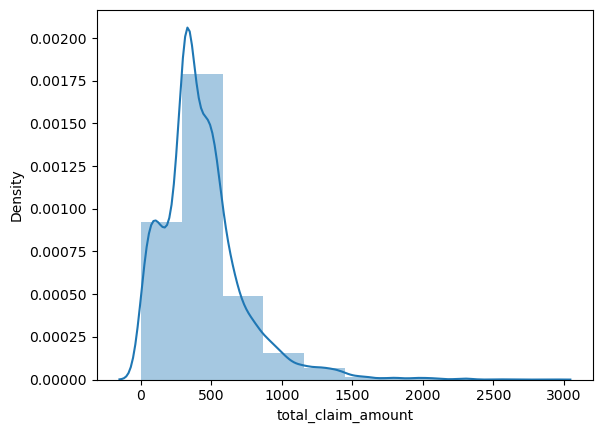

In [232]:
sns.distplot(y_train, bins=10)

In [233]:
# rescaling allowed us to reduce substantially the high outliers but it did create a skew on the left. In the end, rescaling did not improve our R2 -it actually lowered it a bit:

In [234]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2)) 

R2_score: 0.73


In [235]:
result_df = X_test
result_df["target"] = y_test
result_df["scaled_target"] = y_test_scaled
result_df["error"] = y_test_scaled - predictions
result_df.sort_values("error", ascending=False)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,California,Nevada,Oregon,...,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small,target,scaled_target,error
3946,11323.355550,98254,94,23,11,3,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,229.711908,5.436826,1.118533
1794,7591.827171,99359,95,16,19,0,9,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,233.265397,5.452177,1.097509
5992,27064.463390,83560,113,5,76,1,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276.048405,5.620576,1.090395
2201,8456.722498,84574,70,13,75,0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.459769,5.120743,1.070194
6648,3728.873486,83632,94,7,86,4,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,216.839496,5.379157,1.069798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,22563.618380,23046,65,18,7,3,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.687291,0.523124,-3.629802
3932,6827.178202,0,103,2,75,2,6,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.455033,0.898140,-3.729315
664,4160.018087,96263,103,5,5,0,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.924709,0.654775,-3.860422
3881,14886.706020,91193,185,15,75,1,6,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.587888,0.462405,-4.544530


In [236]:
# We should rather remove the outliers as scaling did not bring improvement to R2 (having in mind that overall it will improve the accuracy of the model)

In [237]:
df_no_outliers = data_final[data_final["total_claim_amount"] < 960.3997301249999]
df_no_outliers

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,California,Nevada,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,566.472247,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,529.881344,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,138.130879,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,8256.297800,62902,69,14,94,0,2,159.383042,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,3096.511217,21604,79,14,28,0,1,379.200000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,8163.890428,0,85,9,37,3,2,790.784983,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,7524.442436,21941,96,34,3,0,3,691.200000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [238]:
# Repeating the modeling on the dataframe without outliers: 

# X-y split
X = df_no_outliers.drop(["total_claim_amount"], axis=1)
y = df_no_outliers["total_claim_amount"]

# train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train the model: 
lm = LinearRegression()
lm.fit(X_train, y_train)

# test the model:
predictions = lm.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.78
MSE: 9949.436587278306
RMSE: 99.74686254353219
MAE: 75.67848613487365


In [239]:
# Model accuracy improved slightly with R2 increased by 0.01. But R2 of 0.78 is already good allowing us to drow some conclusions. 

## Results

Provided dataset allows us to predict the total claim amount for different profiles of customers. By analyzing the model provided we can evaluate the profitability of different offers depanding on the vehicle size and type and well as the profile of the customer (gender, marital status, education, occupation etc.).
